### How to plot composite wireline petrophysical log in python — Resistivity, Caliper, Neutron Density logs.

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [2]:
df = pd.read_csv('../data/welldata.csv')
df.head()

,DEPT,CALI,SGR,CGR,THOR,URAN,POTA,ILD,ILM,SFLU,PEF,NPHI,RHOB
0,50.5,5.902,145.146,24.131,2.477,13.727,0.701,18.533,17.162,2000.000,3.938,0.098,2.120
1,51.0,5.895,150.785,28.006,2.884,13.927,0.811,19.029,19.305,1955.824,3.924,0.049,2.100
2,51.5,5.895,155.732,31.508,3.259,14.091,0.909,18.660,20.851,1955.826,3.861,0.049,2.084
3,52.0,5.895,154.033,30.359,3.149,14.028,0.874,17.425,21.394,1955.826,3.629,0.244,2.074
4,52.5,5.895,169.844,40.371,4.755,14.686,1.022,16.477,20.181,2000.001,3.658,3.467,2.064


Exploring data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPT    840 non-null    float64
 1   CALI    840 non-null    float64
 2   SGR     840 non-null    float64
 3   CGR     840 non-null    float64
 4   THOR    840 non-null    float64
 5   URAN    840 non-null    float64
 6   POTA    840 non-null    float64
 7   ILD     840 non-null    float64
 8   ILM     840 non-null    float64
 9   SFLU    840 non-null    float64
 10  PEF     840 non-null    float64
 11  NPHI    840 non-null    float64
 12  RHOB    840 non-null    float64
dtypes: float64(13)
memory usage: 85.4 KB


Add Bitsize column - BS is 6in for this well

In [15]:
df['BS'] = 6

Plotting the composite log.
There will be 3 tracks in the composite log
- GR, BS, CALIPER
- Resistivity
- Neutron Density

In [16]:
df.head()

,DEPT,CALI,SGR,CGR,THOR,URAN,POTA,ILD,ILM,SFLU,PEF,NPHI,RHOB,BS
0,50.5,5.902,145.146,24.131,2.477,13.727,0.701,18.533,17.162,2000.000,3.938,0.098,2.120,6
1,51.0,5.895,150.785,28.006,2.884,13.927,0.811,19.029,19.305,1955.824,3.924,0.049,2.100,6
2,51.5,5.895,155.732,31.508,3.259,14.091,0.909,18.660,20.851,1955.826,3.861,0.049,2.084,6
3,52.0,5.895,154.033,30.359,3.149,14.028,0.874,17.425,21.394,1955.826,3.629,0.244,2.074,6
4,52.5,5.895,169.844,40.371,4.755,14.686,1.022,16.477,20.181,2000.001,3.658,3.467,2.064,6


Defining the canvas with 3 tracks

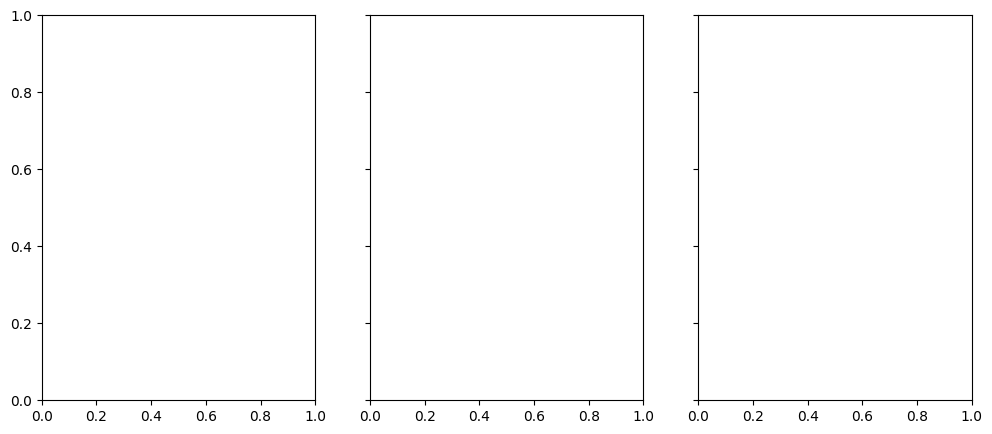

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)


Axes[0] is first subplot, Axes[1] is second and Axes[2] is third.

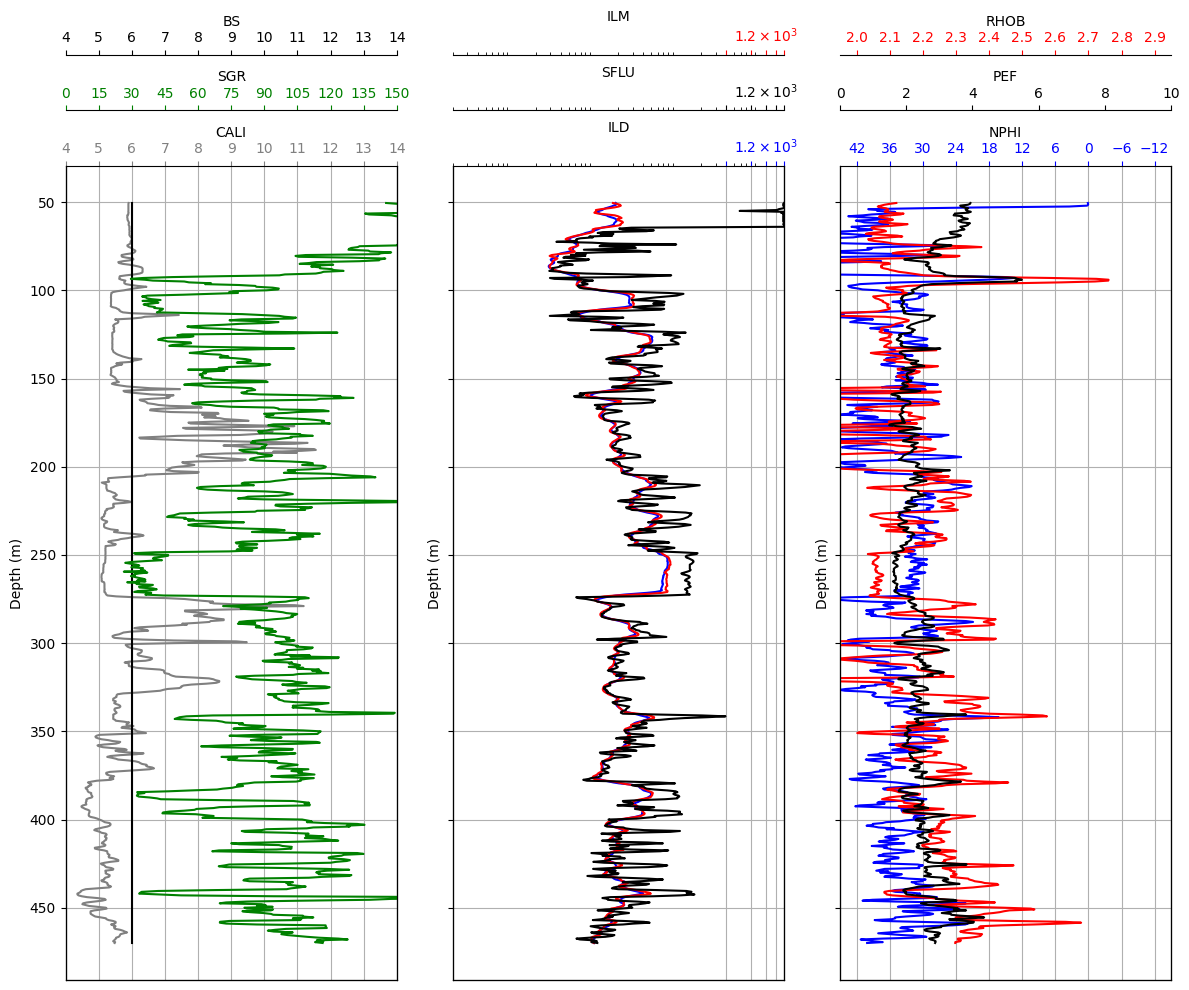

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10), sharey=True)

#Add Cali to the first axes and then give it gray colors, set its label, X axis range, ticks color and number of lines on its grid
axes[0].plot(df['CALI'], df['DEPT'], color='gray')
axes[0].set_xlabel('CALI')
axes[0].set_xlim(4,14)
axes[0].tick_params(axis='x', colors='gray')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(11))

# twinning axes[0] for BS
bs = axes[0].twiny()
bs.plot(df['BS'], df['DEPT'], color='black')
bs.set_xlabel('BS')
bs.set_xlim(4,14)
bs.xaxis.set_major_locator(plt.MaxNLocator(11))
bs.tick_params(axis='x', colors='black')

# twinning axes[0] again for GR
gr = axes[0].twiny()
gr.plot(df['SGR'], df['DEPT'], color='green')
gr.set_xlabel('SGR')
gr.set_xlim(0,150)
gr.xaxis.set_major_locator(plt.MaxNLocator(11))
gr.tick_params(axis='x', colors='green')

# axes[1] will be usef for plotting ILD
# similar properties are assigned but only difference is that we set the xscale to log
axes[1].plot(df['ILD'], df['DEPT'], color='blue')
axes[1].set_xlabel('ILD')
axes[1].set_xscale('log')
axes[1].set_xlim(0.2,2000)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1].tick_params(axis='x', colors='blue')

# twinning axes[1] for ILM
ils = axes[1].twiny()
ils.plot(df['ILM'], df['DEPT'], color='red')
ils.set_xlabel('ILM')
ils.set_xscale('log')
ils.set_xlim(0.2,2000)
ils.xaxis.set_major_locator(plt.MaxNLocator(6))
ils.tick_params(axis='x', colors='red') 

# twinning axes[1] again for SFLU
sflu = axes[1].twiny()
sflu.plot(df['SFLU'], df['DEPT'], color='black')
sflu.set_xlabel('SFLU')
sflu.set_xscale('log')
sflu.set_xlim(0.2,2000)
sflu.xaxis.set_major_locator(plt.MaxNLocator(6))
sflu.tick_params(axis='x', colors='black')

# axes[2] will be usef for plotting NPHI
axes[2].plot(df['NPHI'], df['DEPT'], color='blue')
axes[2].set_xlabel('NPHI')
axes[2].set_xlim(45,-15)
axes[2].xaxis.set_major_locator(plt.MaxNLocator(11))
axes[2].tick_params(axis='x', colors='blue')

# twinning axes[2] for RHOB
rhob = axes[2].twiny()
rhob.plot(df['RHOB'], df['DEPT'], color='red')
rhob.set_xlabel('RHOB')
rhob.set_xlim(1.95,2.95)
rhob.xaxis.set_major_locator(plt.MaxNLocator(11))
rhob.tick_params(axis='x', colors='red')

# twinning axes[2] again for PEF
pef = axes[2].twiny()
pef.plot(df['PEF'], df['DEPT'], color='black')
pef.set_xlabel('PEF')
pef.set_xlim(0,10)
pef.tick_params(axis='x', colors='black')

#Now for each subplot we will invert the Y axis range and set the X axis label position to top and also set the grid to True to be displayed
for i, ax in enumerate(axes):
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('Depth (m)')
    ax.grid(True)

#Now we will set the spines for each subplot to be displayed at the top and also set the number of ticks to be displayed on the Y axis.
#We need to add padding, otherwise the x axes will overlap.
bs.spines['top'].set_position(('outward', 80))
gr.spines['top'].set_position(('outward', 40))

ils.spines['top'].set_position(('outward', 80))
sflu.spines['top'].set_position(('outward', 40))

rhob.spines['top'].set_position(('outward', 80))
pef.spines['top'].set_position(('outward', 40))

# set the number of ticks to be displayed on the Y axis.
axes[0].yaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()
plt.show()